# Trabalho prático Data Science

Importando bibliotecas e arquivos de dados

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline


In [2]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# Para Notebooks
init_notebook_mode(connected=True)
import cufflinks as cf
# For offline use
cf.go_offline()

ModuleNotFoundError: No module named 'plotly'

In [2]:
df_geral = pd.read_csv("Geral.csv", delimiter=";")
ano_15 = pd.read_csv("15.csv")
ano_16 = pd.read_csv("16.csv")
ano_17 = pd.read_csv("17.csv")


# =================================================== 


# Resumo dos valores  do 2017 

In [7]:
descricao_do_17 = ano_17.describe().transpose()
descricao_do_17.drop("count", axis=1).drop("Happiness.Rank")

,mean,std,min,25%,50%,75%,max
Happiness.Score,5.354019,1.131230,2.693000,4.505500,5.279000,6.101500,7.537000
Whisker.high,5.452326,1.118542,2.864884,4.608172,5.370032,6.194600,7.622030
Whisker.low,5.255713,1.145030,2.521116,4.374955,5.193152,6.006527,7.479556
Economy..GDP.per.Capita.,0.984718,0.420793,0.000000,0.663371,1.064578,1.318027,1.870766
Family,1.188898,0.287263,0.000000,1.042635,1.253918,1.414316,1.610574
Health..Life.Expectancy.,0.551341,0.237073,0.000000,0.369866,0.606042,0.723008,0.949492
Freedom,0.408786,0.149997,0.000000,0.303677,0.437454,0.516561,0.658249
Generosity,0.246883,0.134780,0.000000,0.154106,0.231538,0.323762,0.838075
Trust..Government.Corruption.,0.123120,0.101661,0.000000,0.057271,0.089848,0.153296,0.464308
Dystopia.Residual,1.850238,0.500028,0.377914,1.591291,1.832910,2.144654,3.117485


## Primeiros 50 paises do Ranking Paises agrupados por região(2016)

In [8]:
top50 = ano_16[ano_16["Happiness Rank"]< 50]

groupByRegion = top50.groupby(["Region"]).size().to_frame()

groupByRegion.reset_index(inplace=True)
groupByRegion.iplot(kind='bar',x='Region' , width="2")
groupByRegion.iplot(kind='pie', labels='Region', values=0 , width="2")


AttributeError: 'DataFrame' object has no attribute 'iplot'

# ---------------------------------------------------------------------------------------------------------
# Ver correlação entre os atributos

### Correlação entre posição do ranking  e score de felicidade quase perfeita

In [35]:
ano_17.iplot(kind='scatter',x='Happiness.Rank',y='Happiness.Score',mode='markers',size=4)

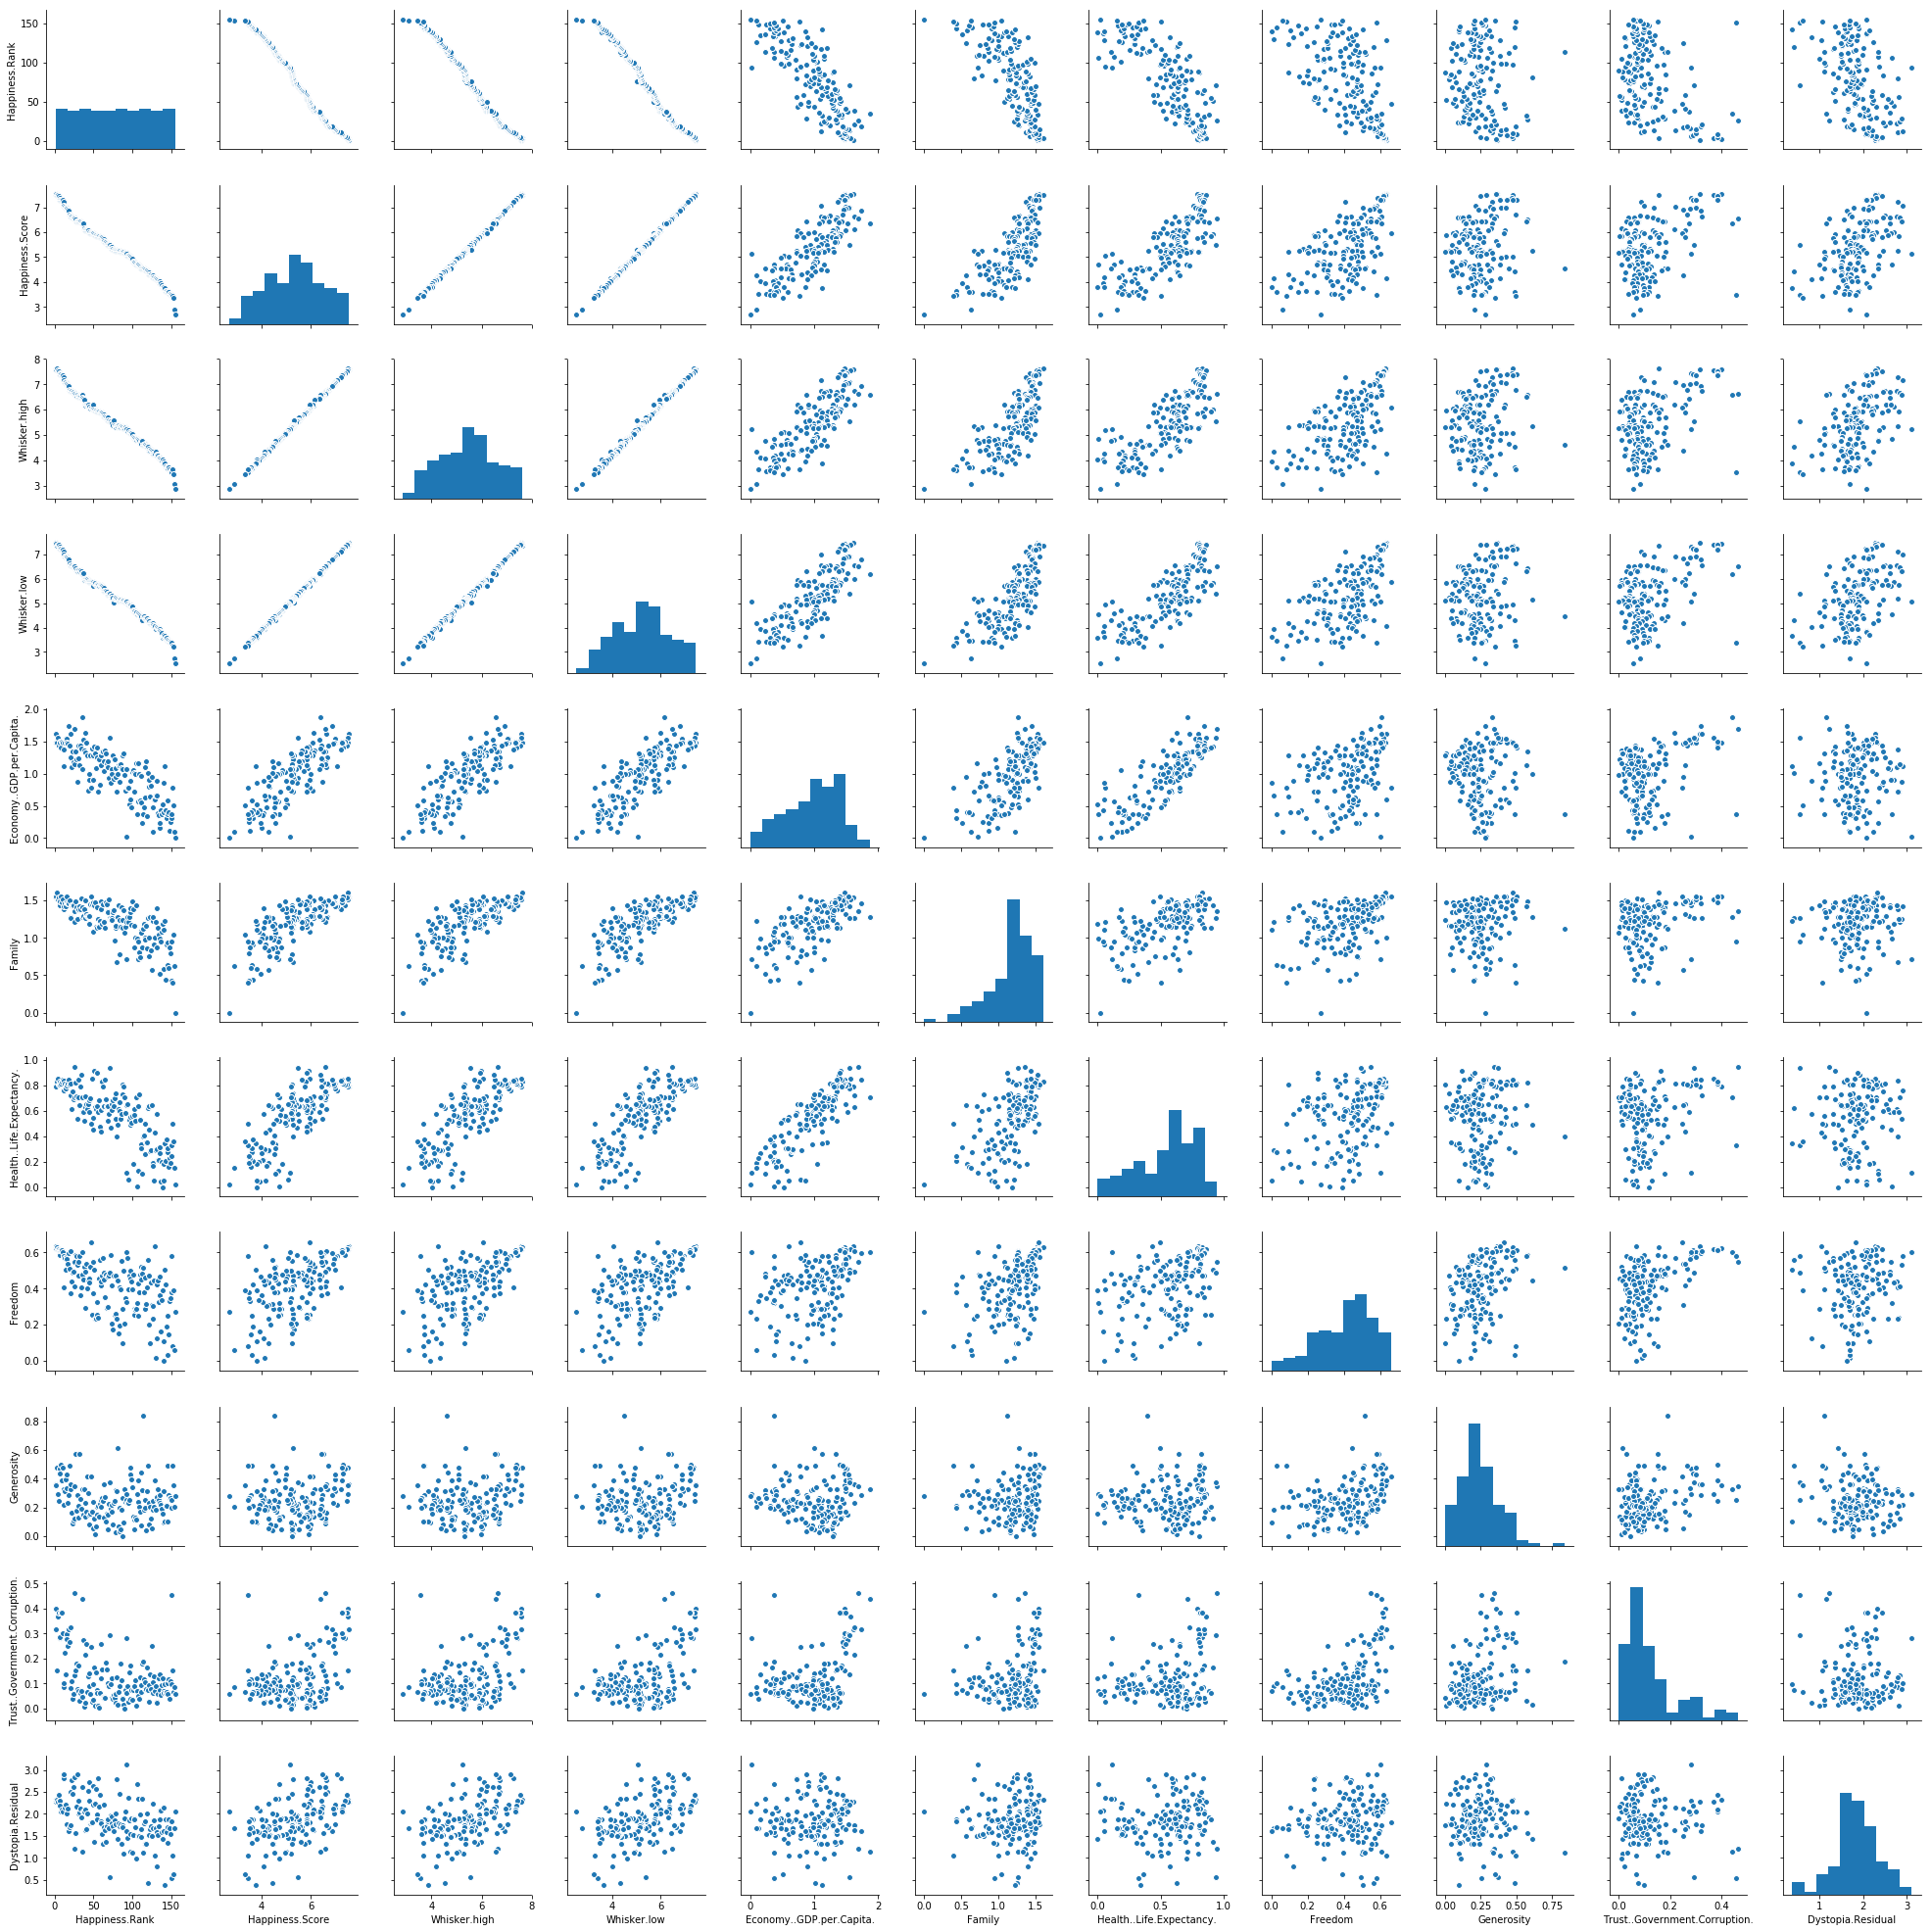

In [8]:
sns.pairplot(ano_17)

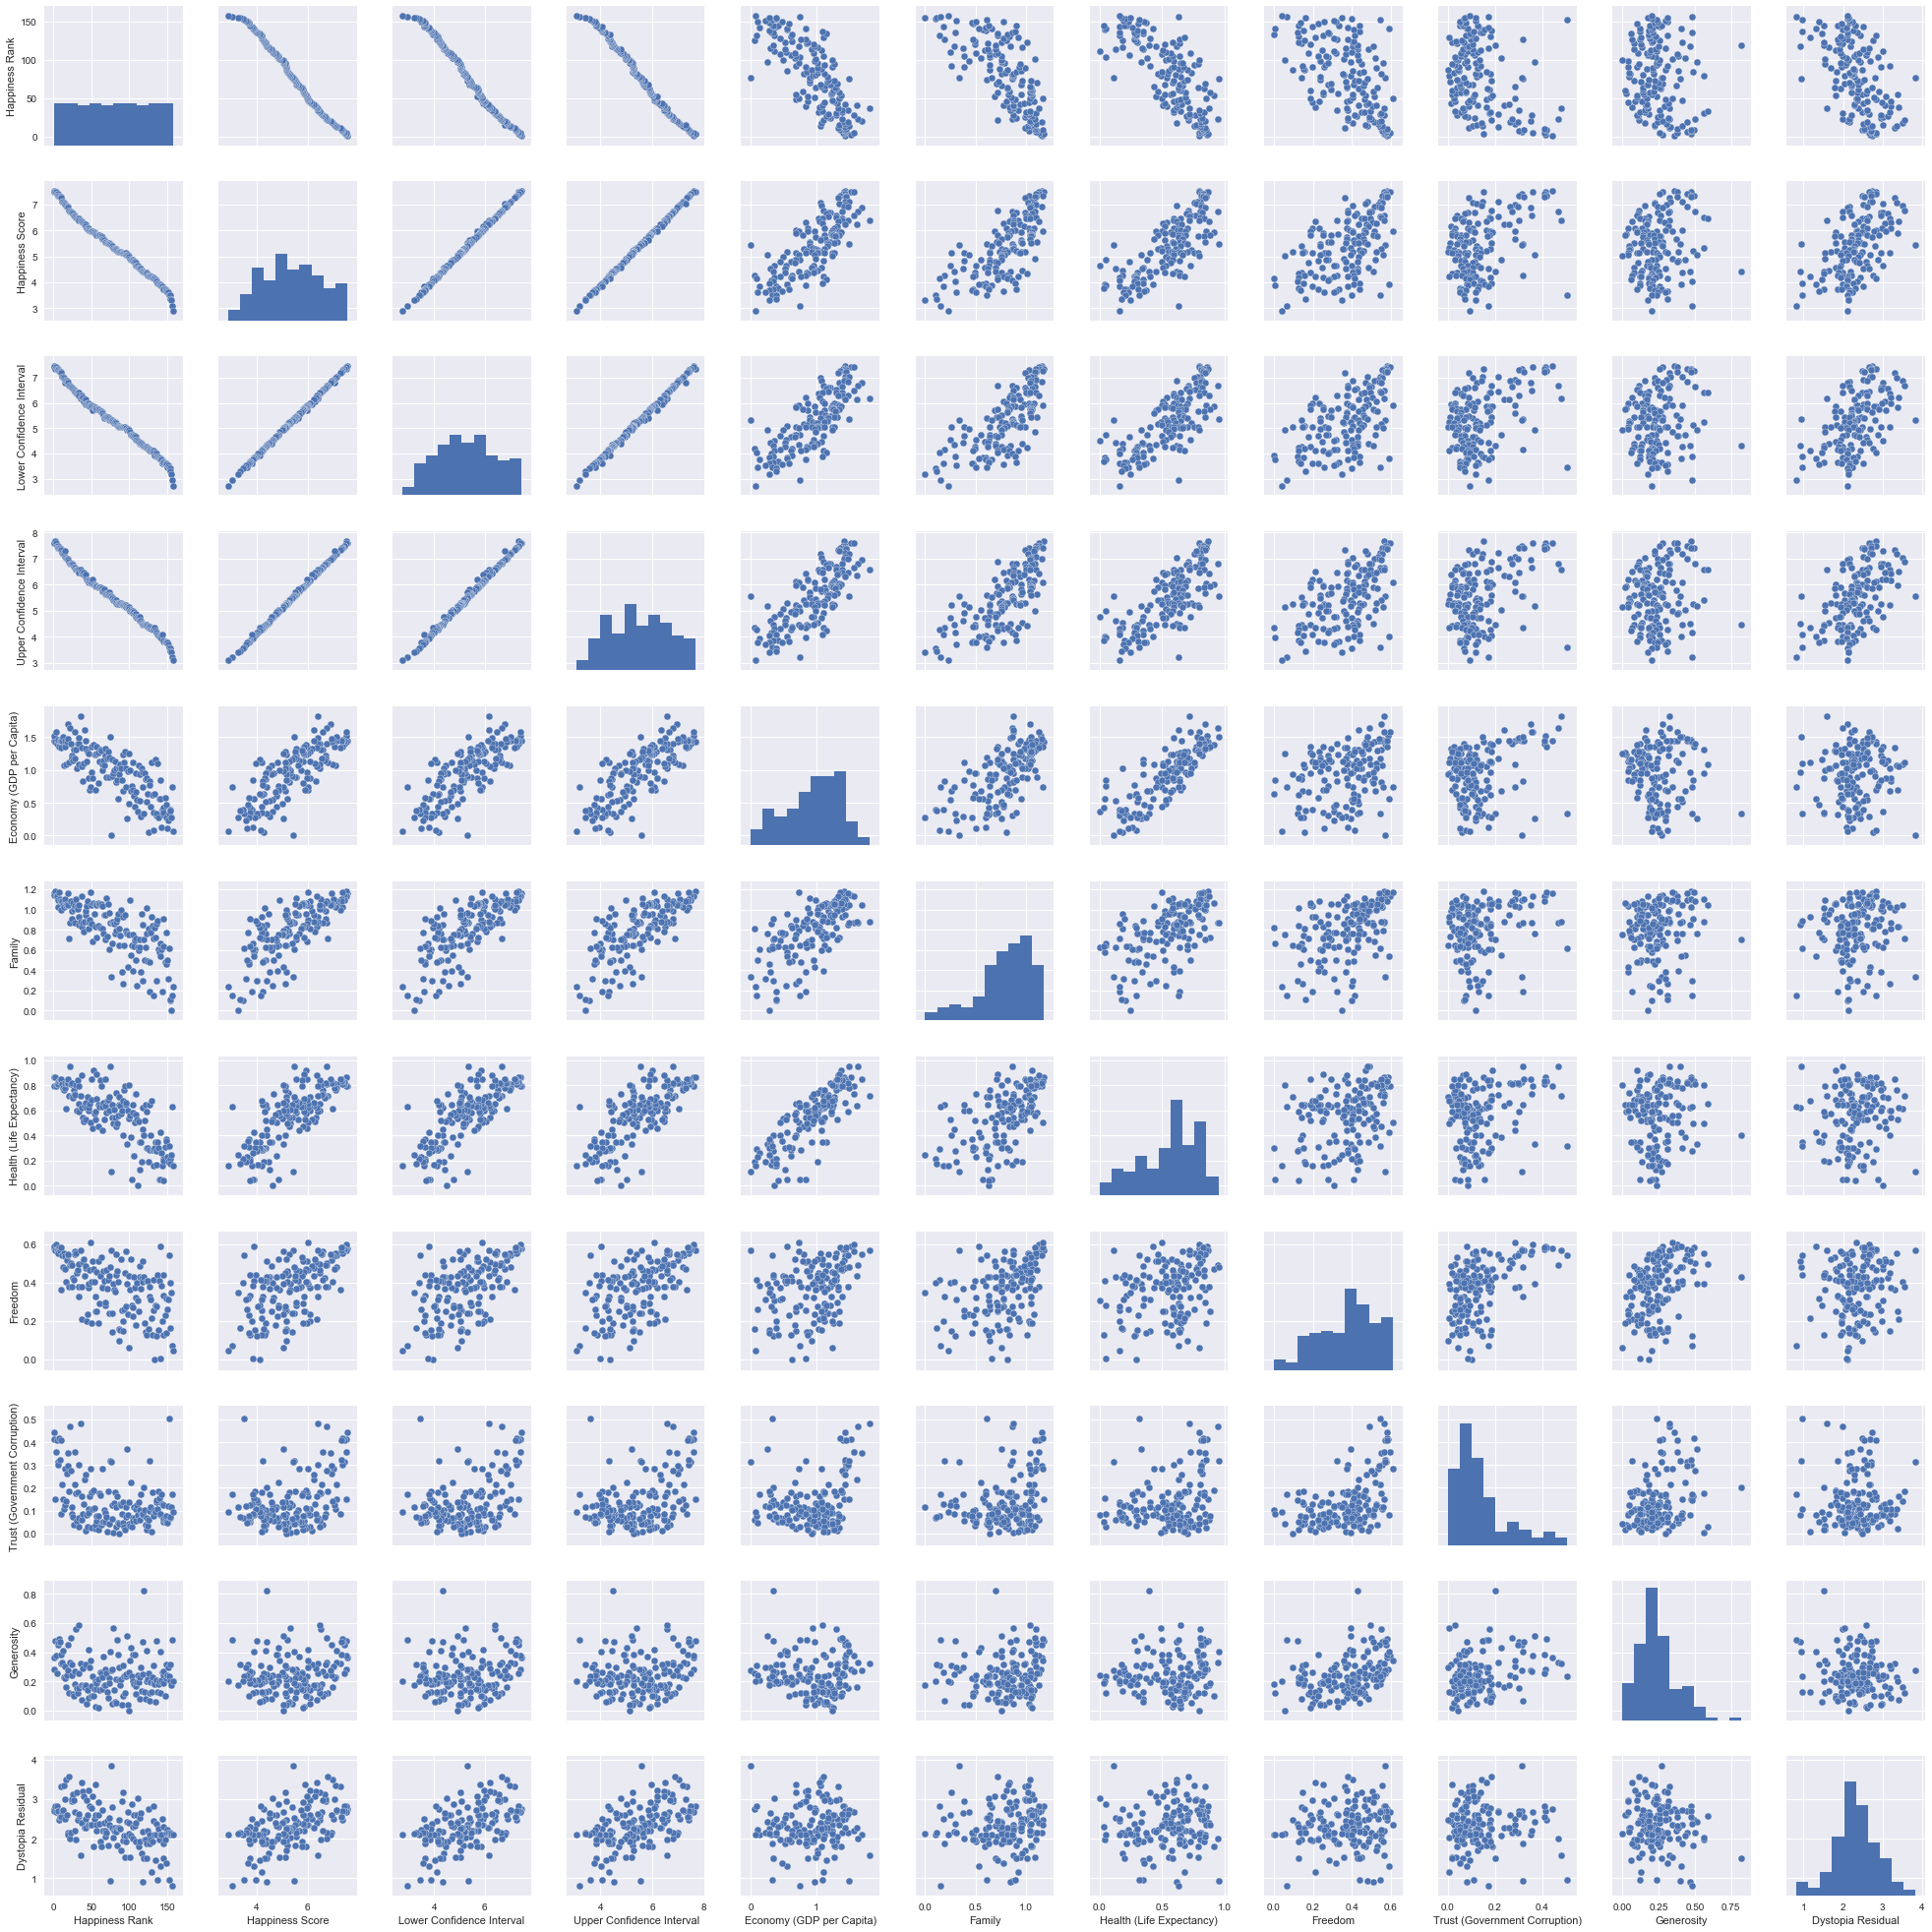

In [88]:
sns.pairplot(ano_16)

# Visualização no mapa

In [14]:
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        reversescale = True,
        locations = ano_17['Country'],
        locationmode = "country names",
        z = ano_17['Happiness.Rank'],
        colorbabr = {'title' : 'Ranking'
                  
                   },
      ) 

layout = dict(title = 'Ranking Felicidade 2017',
                geo = dict(showframe = False,projection = {'type':'Mercator'})
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

NameError: name 'go' is not defined

####  Foi utilizada a biblioteca de visualização plotly que posibilita a utilzação de mapas assim como também a criação de gráficos interativos.
   #### No mapa acima parecem imdicados com cores mais claras os paises no topo do Ranking e as cores mais escuras correspondem aos paises pior ranqueados.